In [12]:
# Chapter3 - Linear Regression

In [15]:
import pandas as pd #pandas library를 pd라는 이름으로 불러오기 
import numpy as np
import matplotlib.pyplot as plt #plot 그릴 때
import seaborn as sns #plot 그릴 때
import requests
from io import StringIO
from mpl_toolkits.mplot3d import axes3d

import sklearn.linear_model as skl_lm #회귀 모델링 할 때
from sklearn.preprocessing import scale
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import statsmodels.formula.api as smf

%matplotlib inline
plt.style.use('seaborn-white')

In [16]:
## Data import

In [17]:
url = 'https://raw.githubusercontent.com/Gyeongdeok/Jeong-Juyeong/master/CH2%2C3(Due%20date%204.25)/Boston.csv'
url_text = requests.get(url).text
bt=pd.read_csv(StringIO(url_text),index_col=0) #web에서 데이터 import
bt.info() # col 14개에 각 변수에 입력값이 506개 있음. 결측치 없음.
bt.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 506 entries, 1 to 506
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 59.3 KB


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [6]:
## Simple Linear Regression

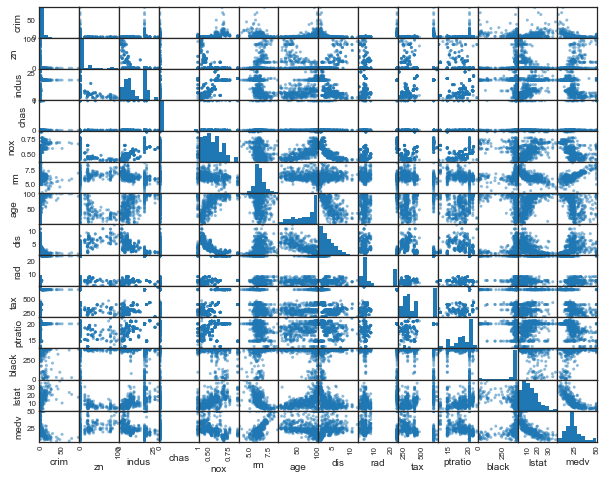

In [7]:
from pandas.plotting import scatter_matrix

scatter_matrix(bt, figsize=(10,8))
plt.show() #변수변환 시급해보이지만 빠른 PASS.

In [22]:
bt.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [23]:
bt.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [46]:
bt.lstat.describe()

count    506.000000
mean      12.653063
std        7.141062
min        1.730000
25%        6.950000
50%       11.360000
75%       16.955000
max       37.970000
Name: lstat, dtype: float64

In [47]:
bt.medv.describe()

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: medv, dtype: float64

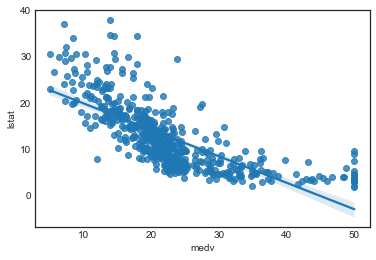

In [45]:
sns.regplot(bt.medv,bt.lstat)

In [80]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
lm1 = smf.ols(formula='medv ~ lstat',data=bt).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Sat, 25 Apr 2020   Prob (F-statistic):           5.08e-88
Time:                        21:22:13   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.5538      0.563     61.415      0.0

In [66]:
lm1.resid.describe()

count    5.060000e+02
mean    -5.746830e-15
std      6.209603e+00
min     -1.516745e+01
25%     -3.989612e+00
50%     -1.318186e+00
75%      2.033701e+00
max      2.450013e+01
dtype: float64

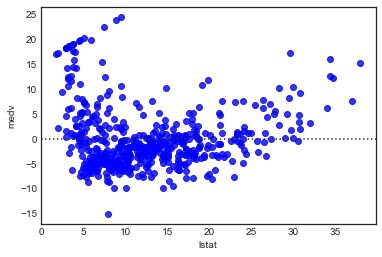

In [72]:
sns.residplot(x='lstat',y='medv',data=bt,color='blue')
plt.show() #resid plot인데 y값이 왜이러지 ?.?

In [68]:
## Multiple linear regression

In [28]:
lm2 = smf.ols(formula='medv ~ lstat + age',data=bt).fit()
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     309.0
Date:                Sat, 25 Apr 2020   Prob (F-statistic):           2.98e-88
Time:                        20:49:24   Log-Likelihood:                -1637.5
No. Observations:                 506   AIC:                             3281.
Df Residuals:                     503   BIC:                             3294.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     33.2228      0.731     45.458      0.0

In [87]:
bt.corr() #Correlation Matrix

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
rm,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [72]:
## Interaction Terms

In [47]:
lm3 = smf.ols(formula='medv ~ lstat * age', data=bt).fit()
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.556
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     209.3
Date:                Sat, 25 Apr 2020   Prob (F-statistic):           4.86e-88
Time:                        21:07:56   Log-Likelihood:                -1635.0
No. Observations:                 506   AIC:                             3278.
Df Residuals:                     502   BIC:                             3295.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.0885      1.470     24.553      0.0

In [40]:
# Response에서 특정 column을 feature로 할래(medv 제외) -> formula형성.
columns_selected = "+".join(bt.columns.difference(["medv"]))
#difference -> 차집합(집합자료형)
#join -> 리스트에 특성 구분자를 추가하여 문자열로 반환.(리스트->문자열)
print("!".join("힝힝힝"))
print(columns_selected)

힝!힝!힝
age+black+chas+crim+dis+indus+lstat+nox+ptratio+rad+rm+tax+zn


In [42]:
##test set으로 response prediction

In [45]:
test = pd.DataFrame({'age':[65.4,79,23],'lstat':[4.8,10,5]})
#dictionary -> dataframe이렇게 되는건가
#age라는 key에 list를 물고있는 형태.

In [57]:
list(lm3.predict(exog=test)) #exogenous(외인성->x), endogenous(내생의->y)

[30.663867291104303, 25.39362158514937, 29.589306425052783]

In [64]:
# residual 계산
lm2.resid

1      -6.335350
2      -4.915202
3       3.525817
4       1.629390
5       6.605862
         ...    
502    -3.229671
503    -5.901129
504    -6.645429
505    -7.619766
506   -15.981243
Length: 506, dtype: float64

In [77]:
## Non-linear Transformation of the Predictors

In [81]:
lstat_2 = bt.lstat**2
lm4 = smf.ols(formula='medv ~ lstat + lstat_2',data=bt).fit()
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     448.5
Date:                Sat, 25 Apr 2020   Prob (F-statistic):          1.56e-112
Time:                        21:22:16   Log-Likelihood:                -1581.3
No. Observations:                 506   AIC:                             3169.
Df Residuals:                     503   BIC:                             3181.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     42.8620      0.872     49.149      0.0

In [73]:
## ANOVA test to compare two models(새로 추가된 TERM의 유의성 검정)

In [82]:
table = sm.stats.anova_lm(lm1,lm4,typ=1)
print(table)

   df_resid           ssr  df_diff     ss_diff           F        Pr(>F)
0     504.0  19472.381418      0.0         NaN         NaN           NaN
1     503.0  15347.243158      1.0  4125.13826  135.199822  7.630116e-28


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)
